In [1]:
import importlib
import numpy as np
import soundfile as sf

import nsltools as nslpy
import nsltools_expansion as nslpy2
import util.metric as umetric

In [2]:
importlib.reload(nslpy2)

<module 'nsltools_expansion' from '/cfarhomes/ilyak/ilyakavalerov@gmail.com/ramawks69/pyfst/nsltools_expansion.py'>

In [3]:
importlib.reload(umetric)

<module 'util.metric' from '/cfarhomes/ilyak/ilyakavalerov@gmail.com/ramawks69/pyfst/util/metric.py'>

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import IPython.display as ipd
import librosa.display

# Load Data

In [5]:
y, sr = sf.read('/scratch1/ilya/locDoc/data/LibriSpeech/train-clean-100/103/1240/103-1240-0000.flac')
y = np.array(y[7*sr:9*sr])
y = y[::2][:8181]

In [6]:
ipd.Audio(y, rate=8000)

In [7]:
y2, sr = sf.read('/scratch1/ilya/locDoc/data/LibriSpeech/train-clean-100/1263/138246/1263-138246-0000.flac')
y2 = y2[7*sr:9*sr]
y2 = y2[::2][:8181]

In [8]:
ipd.Audio(y2, rate=8000)

In [9]:
y_mix = y + y2

In [52]:
ipd.Audio(y_mix, rate=8000)

## mask in audspec

In [10]:
audspec = nslpy2.wav2aud_8kHz(y)
audspec2 = nslpy2.wav2aud_8kHz(y2)
audspec_mix = nslpy2.wav2aud_8kHz(y_mix)

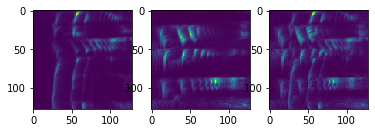

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.imshow(audspec)
ax2.imshow(audspec2)
ax3.imshow( audspec_mix)


In [12]:
oracle_mask = (audspec > audspec2).astype(int)

In [13]:
umetric.snr(audspec, oracle_mask*audspec_mix)

11.220398569173671

In [14]:
umetric.snr(audspec2, (1-oracle_mask)*audspec_mix)

13.313287810922073

### listen

In [15]:
_, rec_min, _ = nslpy2.aud2wav_8kHz(oracle_mask*audspec_mix, y_mix)
_, rec_min2, _ = nslpy2.aud2wav_8kHz((1-oracle_mask)*audspec_mix, y_mix)

0, Err.: 61.75 (rel.) 160.32 (abs.) Energy: 1.5613098083637789
1, Err.: 7.99 (rel.) 28.14 (abs.) Energy: 1.6290186011390166
2, Err.: 7.16 (rel.) 26.76 (abs.) Energy: 1.6280763927975235
3, Err.: 6.93 (rel.) 26.53 (abs.) Energy: 1.6303249426254602
4, Err.: 6.34 (rel.) 26.14 (abs.) Energy: 1.6142323524601914
5, Err.: 5.73 (rel.) 26.07 (abs.) Energy: 1.6049457324020786
6, Err.: 5.93 (rel.) 26.37 (abs.) Energy: 1.6157145438907383
7, Err.: 6.54 (rel.) 26.57 (abs.) Energy: 1.633003842193686
8, Err.: 6.82 (rel.) 26.41 (abs.) Energy: 1.6399833540023834
9, Err.: 6.51 (rel.) 26.11 (abs.) Energy: 1.6262326644335405
Minimum Error: 5.73 %
0, Err.: 38.51 (rel.) 62.37 (abs.) Energy: 2.398615354652203
1, Err.: 5.34 (rel.) 27.18 (abs.) Energy: 2.5291785510960905
2, Err.: 6.18 (rel.) 26.47 (abs.) Energy: 2.577444961132377
3, Err.: 6.56 (rel.) 26.16 (abs.) Energy: 2.594143434593917
4, Err.: 5.49 (rel.) 25.37 (abs.) Energy: 2.5436910235736745
5, Err.: 4.1 (rel.) 25.05 (abs.) Energy: 2.5005319692205834
6, E

In [16]:
ipd.Audio(rec_min, rate=8000)

In [17]:
ipd.Audio(rec_min2, rate=8000)

## mask in cortical

In [18]:
cfs = nslpy2.get_cfs(128)

In [19]:
cort = nslpy2.forward_cortical(cfs, audspec)
cort2 = nslpy2.forward_cortical(cfs, audspec2)
oracle_mask_c = (np.abs(cort) > np.abs(cort2)).astype(int)
# oracle_mask_c_real = (np.real(cort) > np.real(cort2)).astype(int)
# oracle_mask_c_imag = (np.imag(cort) > np.imag(cort2)).astype(int)

In [20]:
audspec_fb = nslpy2.fft_backward_cortical(cfs, cort)
audspec2_fb = nslpy2.fft_backward_cortical(cfs, cort2)

In [21]:
cort_mix = nslpy2.forward_cortical(cfs, audspec_mix)

In [22]:
audspec_est = nslpy2.fft_backward_cortical(cfs, cort_mix*oracle_mask_c)
audspec2_est = nslpy2.fft_backward_cortical(cfs, cort_mix*(1-oracle_mask_c))

In [23]:
_, rec_min, _ = nslpy2.aud2wav_8kHz(np.abs(audspec_est), y_mix)
_, rec_min2, _ = nslpy2.aud2wav_8kHz(np.abs(audspec2_est), y_mix)

0, Err.: 65.64 (rel.) 193.64 (abs.) Energy: 1.2783544727258174
1, Err.: 19.68 (rel.) 33.22 (abs.) Energy: 1.478635940664327
2, Err.: 16.69 (rel.) 28.54 (abs.) Energy: 1.5087812234733586
3, Err.: 13.96 (rel.) 26.77 (abs.) Energy: 1.5003846398668932
4, Err.: 11.61 (rel.) 25.8 (abs.) Energy: 1.4719191504451437
5, Err.: 9.95 (rel.) 25.52 (abs.) Energy: 1.46210535883365
6, Err.: 9.14 (rel.) 25.29 (abs.) Energy: 1.4630445364658609
7, Err.: 8.61 (rel.) 24.97 (abs.) Energy: 1.4542355336789226
8, Err.: 7.92 (rel.) 24.78 (abs.) Energy: 1.4483172115400524
9, Err.: 7.35 (rel.) 24.6 (abs.) Energy: 1.4253180845829014
Minimum Error: 7.35 %
0, Err.: 45.18 (rel.) 70.59 (abs.) Energy: 2.2649268456980938
1, Err.: 15.97 (rel.) 31.33 (abs.) Energy: 2.529197528576299
2, Err.: 12.92 (rel.) 27.54 (abs.) Energy: 2.5189186926571083
3, Err.: 11.58 (rel.) 27.08 (abs.) Energy: 2.543593918329868
4, Err.: 11.04 (rel.) 26.71 (abs.) Energy: 2.5832056567769124
5, Err.: 10.54 (rel.) 26.07 (abs.) Energy: 2.59004748741556

In [24]:
umetric.snr(audspec, np.abs(audspec_est))

4.9127645868356415

In [25]:
umetric.snr(audspec2, np.abs(audspec2_est))

5.902787651857365

In [26]:
umetric.snr(np.abs(audspec_fb), np.abs(audspec_est))

10.504084782041359

In [27]:
umetric.snr(np.abs(audspec2_fb), np.abs(audspec2_est))

13.516521756610956

In [28]:
ipd.Audio(rec_min, rate=8000)

In [29]:
ipd.Audio(rec_min2, rate=8000)

# 16 kHz

In [30]:
y, sr = sf.read('/scratch1/ilya/locDoc/data/LibriSpeech/train-clean-100/103/1240/103-1240-0000.flac')
y = np.array(y[7*sr:9*sr])
y = y[:(2*8181)]

In [31]:
y2, sr = sf.read('/scratch1/ilya/locDoc/data/LibriSpeech/train-clean-100/1263/138246/1263-138246-0000.flac')
y2 = y2[7*sr:9*sr]
y2 = y2[:(2*8181)]

In [32]:
audspec = nslpy.wav2aud(y,  [8,8,-2,0])
audspec2 = nslpy.wav2aud(y2,  [8,8,-2,0])
audspec_mix = nslpy.wav2aud(y+y2,  [8,8,-2,0])

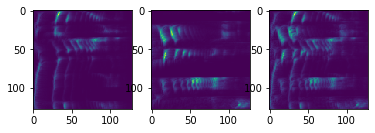

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.imshow(audspec)
ax2.imshow(audspec2)
ax3.imshow( audspec_mix)


In [34]:
oracle_mask = (audspec > audspec2).astype(int)

In [35]:
umetric.snr(audspec, oracle_mask*audspec_mix)

12.030171762442874

In [36]:
umetric.snr(audspec2, (1-oracle_mask)*audspec_mix)

12.703811926992936

### listen

In [37]:
((oracle_mask*audspec_mix)).shape

(128, 128)

In [38]:
_, rec_min, _ = nslpy.aud2wav(oracle_mask*audspec_mix, y+y2, [8,8,-2,0] + [10,0,0])
_, rec_min2, _ = nslpy.aud2wav((1-oracle_mask)*audspec_mix, y+y2, [8,8,-2,0] + [10,0,0])

0, Err.: 56.09 (rel.) 124.97 (abs.) Energy: 3.257697469157644
1, Err.: 6.86 (rel.) 27.16 (abs.) Energy: 3.36937235455546
2, Err.: 6.24 (rel.) 26.0 (abs.) Energy: 3.3657846632225805
3, Err.: 6.0 (rel.) 25.83 (abs.) Energy: 3.37233230413975
4, Err.: 5.43 (rel.) 25.46 (abs.) Energy: 3.343961100601284
5, Err.: 4.86 (rel.) 25.35 (abs.) Energy: 3.321869121453053
6, Err.: 5.05 (rel.) 25.64 (abs.) Energy: 3.3367648617610173
7, Err.: 5.65 (rel.) 25.88 (abs.) Energy: 3.371062091985733
8, Err.: 5.9 (rel.) 25.75 (abs.) Energy: 3.3900172438199636
9, Err.: 5.58 (rel.) 25.43 (abs.) Energy: 3.3637837590460813
Minimum Error: 4.86 %
0, Err.: 44.88 (rel.) 80.02 (abs.) Energy: 3.9074814854137685
1, Err.: 5.46 (rel.) 27.26 (abs.) Energy: 4.103473665185664
2, Err.: 5.29 (rel.) 26.1 (abs.) Energy: 4.105507644706744
3, Err.: 5.35 (rel.) 26.08 (abs.) Energy: 4.120327045358067
4, Err.: 4.9 (rel.) 25.73 (abs.) Energy: 4.098413584165869
5, Err.: 4.39 (rel.) 25.57 (abs.) Energy: 4.071719640577703
6, Err.: 4.46 (re

In [39]:
ipd.Audio(rec_min, rate=16000)

In [40]:
ipd.Audio(rec_min2, rate=16000)

## listen to masking in cortical

In [41]:
cort = nslpy2.forward_cortical(cfs, audspec)
cort2 = nslpy2.forward_cortical(cfs, audspec2)
oracle_mask_c = (np.abs(cort) > np.abs(cort2)).astype(int)
# oracle_mask_c = (np.real(cort) > np.real(cort2)).astype(int)

In [42]:
audspec_fb = nslpy2.fft_backward_cortical(cfs, cort)
audspec2_fb = nslpy2.fft_backward_cortical(cfs, cort2)

In [43]:
cort_mix = nslpy2.forward_cortical(cfs, audspec_mix)

In [44]:
audspec_est = nslpy2.fft_backward_cortical(cfs, cort_mix*oracle_mask_c)
audspec2_est = nslpy2.fft_backward_cortical(cfs, cort_mix*(1-oracle_mask_c))

In [45]:
_, rec_min, _ = nslpy.aud2wav(np.abs(audspec_est), y+y2, [8,8,-2,0] + [10,0,0])
_, rec_min2, _ = nslpy.aud2wav(np.abs(audspec2_est), y+y2, [8,8,-2,0] + [10,0,0])

0, Err.: 64.22 (rel.) 144.71 (abs.) Energy: 2.8067366029555867
1, Err.: 18.6 (rel.) 32.47 (abs.) Energy: 3.2043890309147716
2, Err.: 15.65 (rel.) 28.1 (abs.) Energy: 3.273357986879773
3, Err.: 13.13 (rel.) 26.39 (abs.) Energy: 3.253228409007369
4, Err.: 10.94 (rel.) 25.52 (abs.) Energy: 3.199776577006981
5, Err.: 9.46 (rel.) 25.25 (abs.) Energy: 3.1773094419636294
6, Err.: 8.65 (rel.) 25.02 (abs.) Energy: 3.1678531006237556
7, Err.: 8.12 (rel.) 24.83 (abs.) Energy: 3.157273689752973
8, Err.: 7.49 (rel.) 24.59 (abs.) Energy: 3.1415200819477125
9, Err.: 6.88 (rel.) 24.42 (abs.) Energy: 3.10002061943136
Minimum Error: 6.88 %
0, Err.: 48.77 (rel.) 88.34 (abs.) Energy: 3.574950726486481
1, Err.: 15.76 (rel.) 31.58 (abs.) Energy: 3.9664906288927884
2, Err.: 12.23 (rel.) 27.56 (abs.) Energy: 3.9605095342702437
3, Err.: 10.41 (rel.) 26.77 (abs.) Energy: 3.9575961674157614
4, Err.: 9.44 (rel.) 26.42 (abs.) Energy: 3.9837716606842752
5, Err.: 8.9 (rel.) 26.02 (abs.) Energy: 4.026419462750553
6, 

In [46]:
umetric.snr(audspec, np.abs(audspec_est))

4.888194393174113

In [47]:
umetric.snr(audspec2, np.abs(audspec2_est))

5.785240834403006

In [48]:
umetric.snr(np.abs(audspec_fb), np.abs(audspec_est))

11.222052862301712

In [49]:
umetric.snr(np.abs(audspec2_fb), np.abs(audspec2_est))

12.553625733219064

In [ ]:
ipd.Audio(rec_min, rate=16000)

In [51]:
ipd.Audio(rec_min2, rate=16000)

## how good can it sound?

In [58]:
import scipy

In [59]:
audspec_ft = scipy.fft.fft2(audspec, (256,256))
audspec_ft = audspec_ft[:,:128]

audspec2_ft = scipy.fft.fft2(audspec2, (256,256))
audspec2_ft = audspec2_ft[:,:128]

cort = nslpy2.fft_forward_cortical(cfs, audspec_ft)
cort2 = nslpy2.fft_forward_cortical(cfs, audspec2_ft)
audspec_fb = nslpy2.fft_backward_cortical(cfs, cort)
audspec2_fb = nslpy2.fft_backward_cortical(cfs, cort2)

_, rec_min, _ = nslpy.aud2wav(np.abs(audspec_fb), y+y2, [8,8,-2,0] + [10,0,0])
_, rec_min2, _ = nslpy.aud2wav(np.abs(audspec2_fb), y+y2, [8,8,-2,0] + [10,0,0])

0, Err.: 54.5 (rel.) 102.68 (abs.) Energy: 3.4823528283659337
1, Err.: 11.51 (rel.) 29.67 (abs.) Energy: 3.5717348066540495
2, Err.: 8.68 (rel.) 27.73 (abs.) Energy: 3.5939359905680917
3, Err.: 7.17 (rel.) 26.8 (abs.) Energy: 3.629038082010803
4, Err.: 6.11 (rel.) 26.02 (abs.) Energy: 3.633408680417414
5, Err.: 5.36 (rel.) 25.63 (abs.) Energy: 3.6312069552378117
6, Err.: 5.16 (rel.) 25.59 (abs.) Energy: 3.645654583841237
7, Err.: 5.23 (rel.) 25.55 (abs.) Energy: 3.6703681345350097
8, Err.: 5.19 (rel.) 25.33 (abs.) Energy: 3.690324884447622
9, Err.: 4.9 (rel.) 25.02 (abs.) Energy: 3.6774393774807352
Minimum Error: 4.9 %
0, Err.: 42.4 (rel.) 61.97 (abs.) Energy: 4.513002254544572
1, Err.: 11.7 (rel.) 31.03 (abs.) Energy: 4.6225623615502425
2, Err.: 8.97 (rel.) 29.11 (abs.) Energy: 4.6874417325249595
3, Err.: 7.62 (rel.) 28.04 (abs.) Energy: 4.750462941019828
4, Err.: 6.98 (rel.) 27.36 (abs.) Energy: 4.782705544582688
5, Err.: 6.63 (rel.) 27.03 (abs.) Energy: 4.833875915745729
6, Err.: 6.

In [60]:
ipd.Audio(rec_min, rate=16000)

In [61]:
ipd.Audio(rec_min2, rate=16000)

Same distortion when involving cortical either fft or 